In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma', n_colors=None, desat=None, color_codes=False)
pc = ['#FFB6C1', '#FFA07A', '#FFD700', '#98FB98', '#DDA0DD', '#87CEEB', '#F0E68C', '#FFE4E1', '#98FB98', '#FF69B4']
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Description of the Diamonds Data set

>**Description of the all Attributes of dataset**

  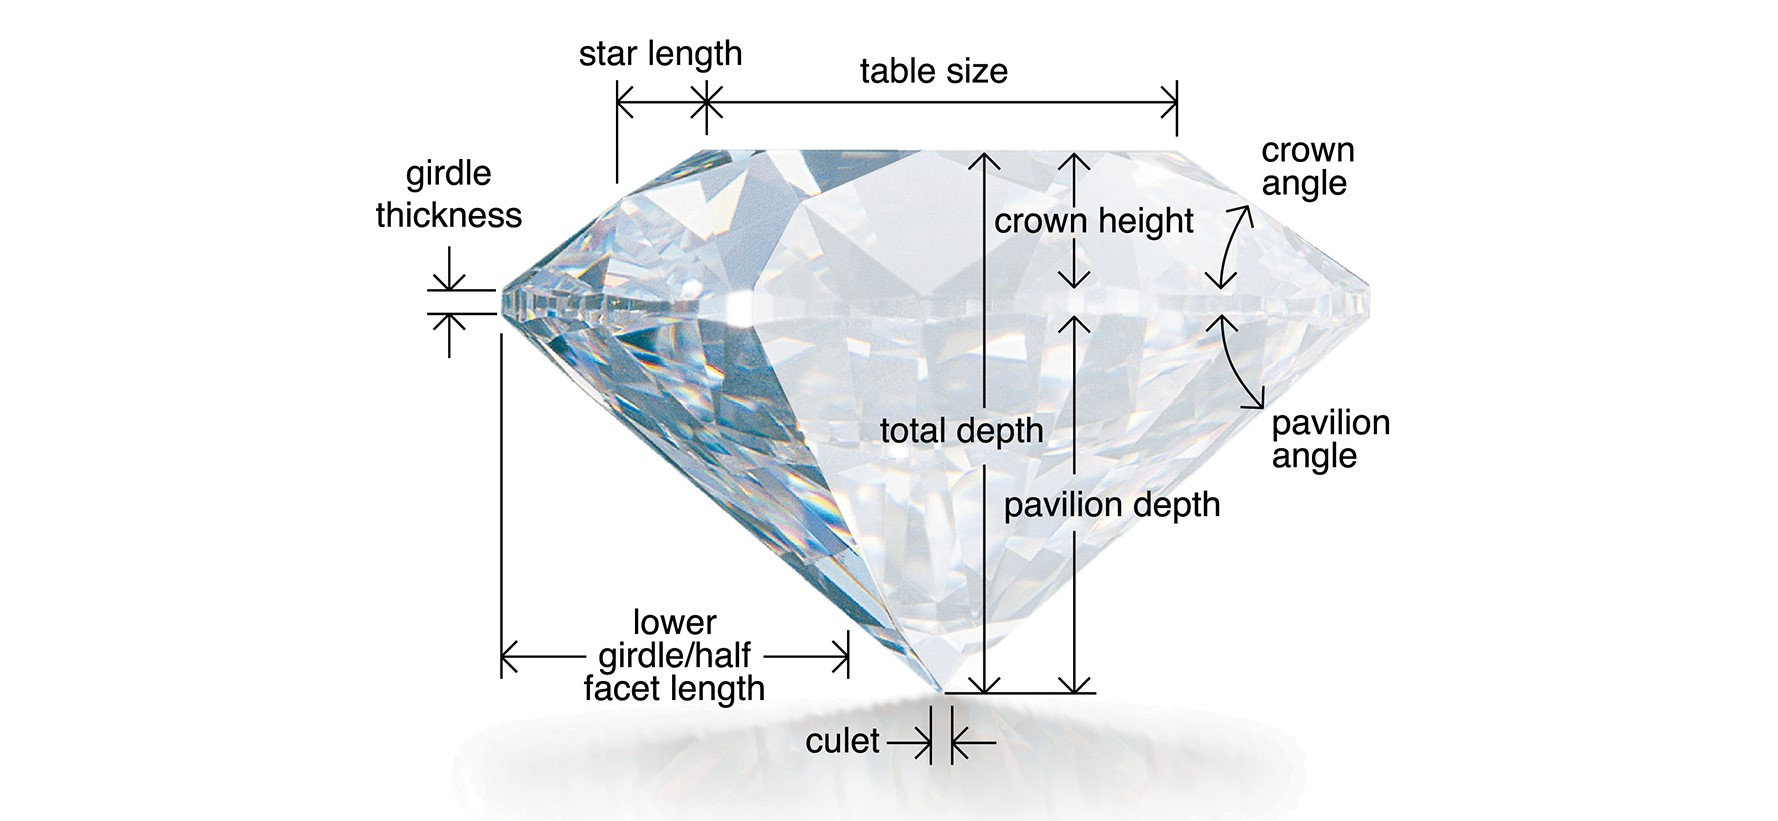

1.  **Cut** : It refers to one of the 10 or so most common diamond cuts. This dataset has an additional one called the 'Cushion Modified'.
  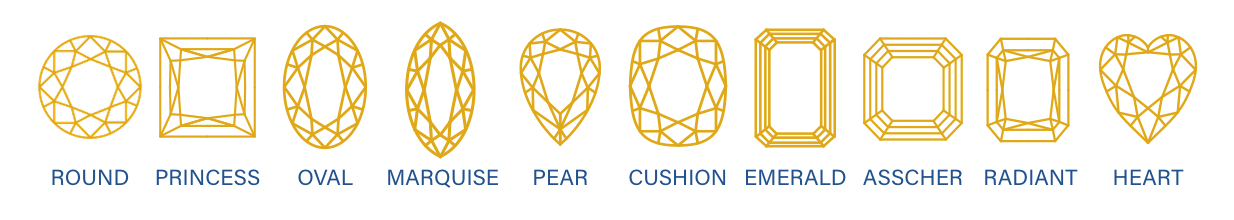
1.  **Color:** Indicates the color grade or hue of the gemstone, typically ranging from D (colorless) to Z (light yellow or brown) in the GIA color grading scale for diamonds.

      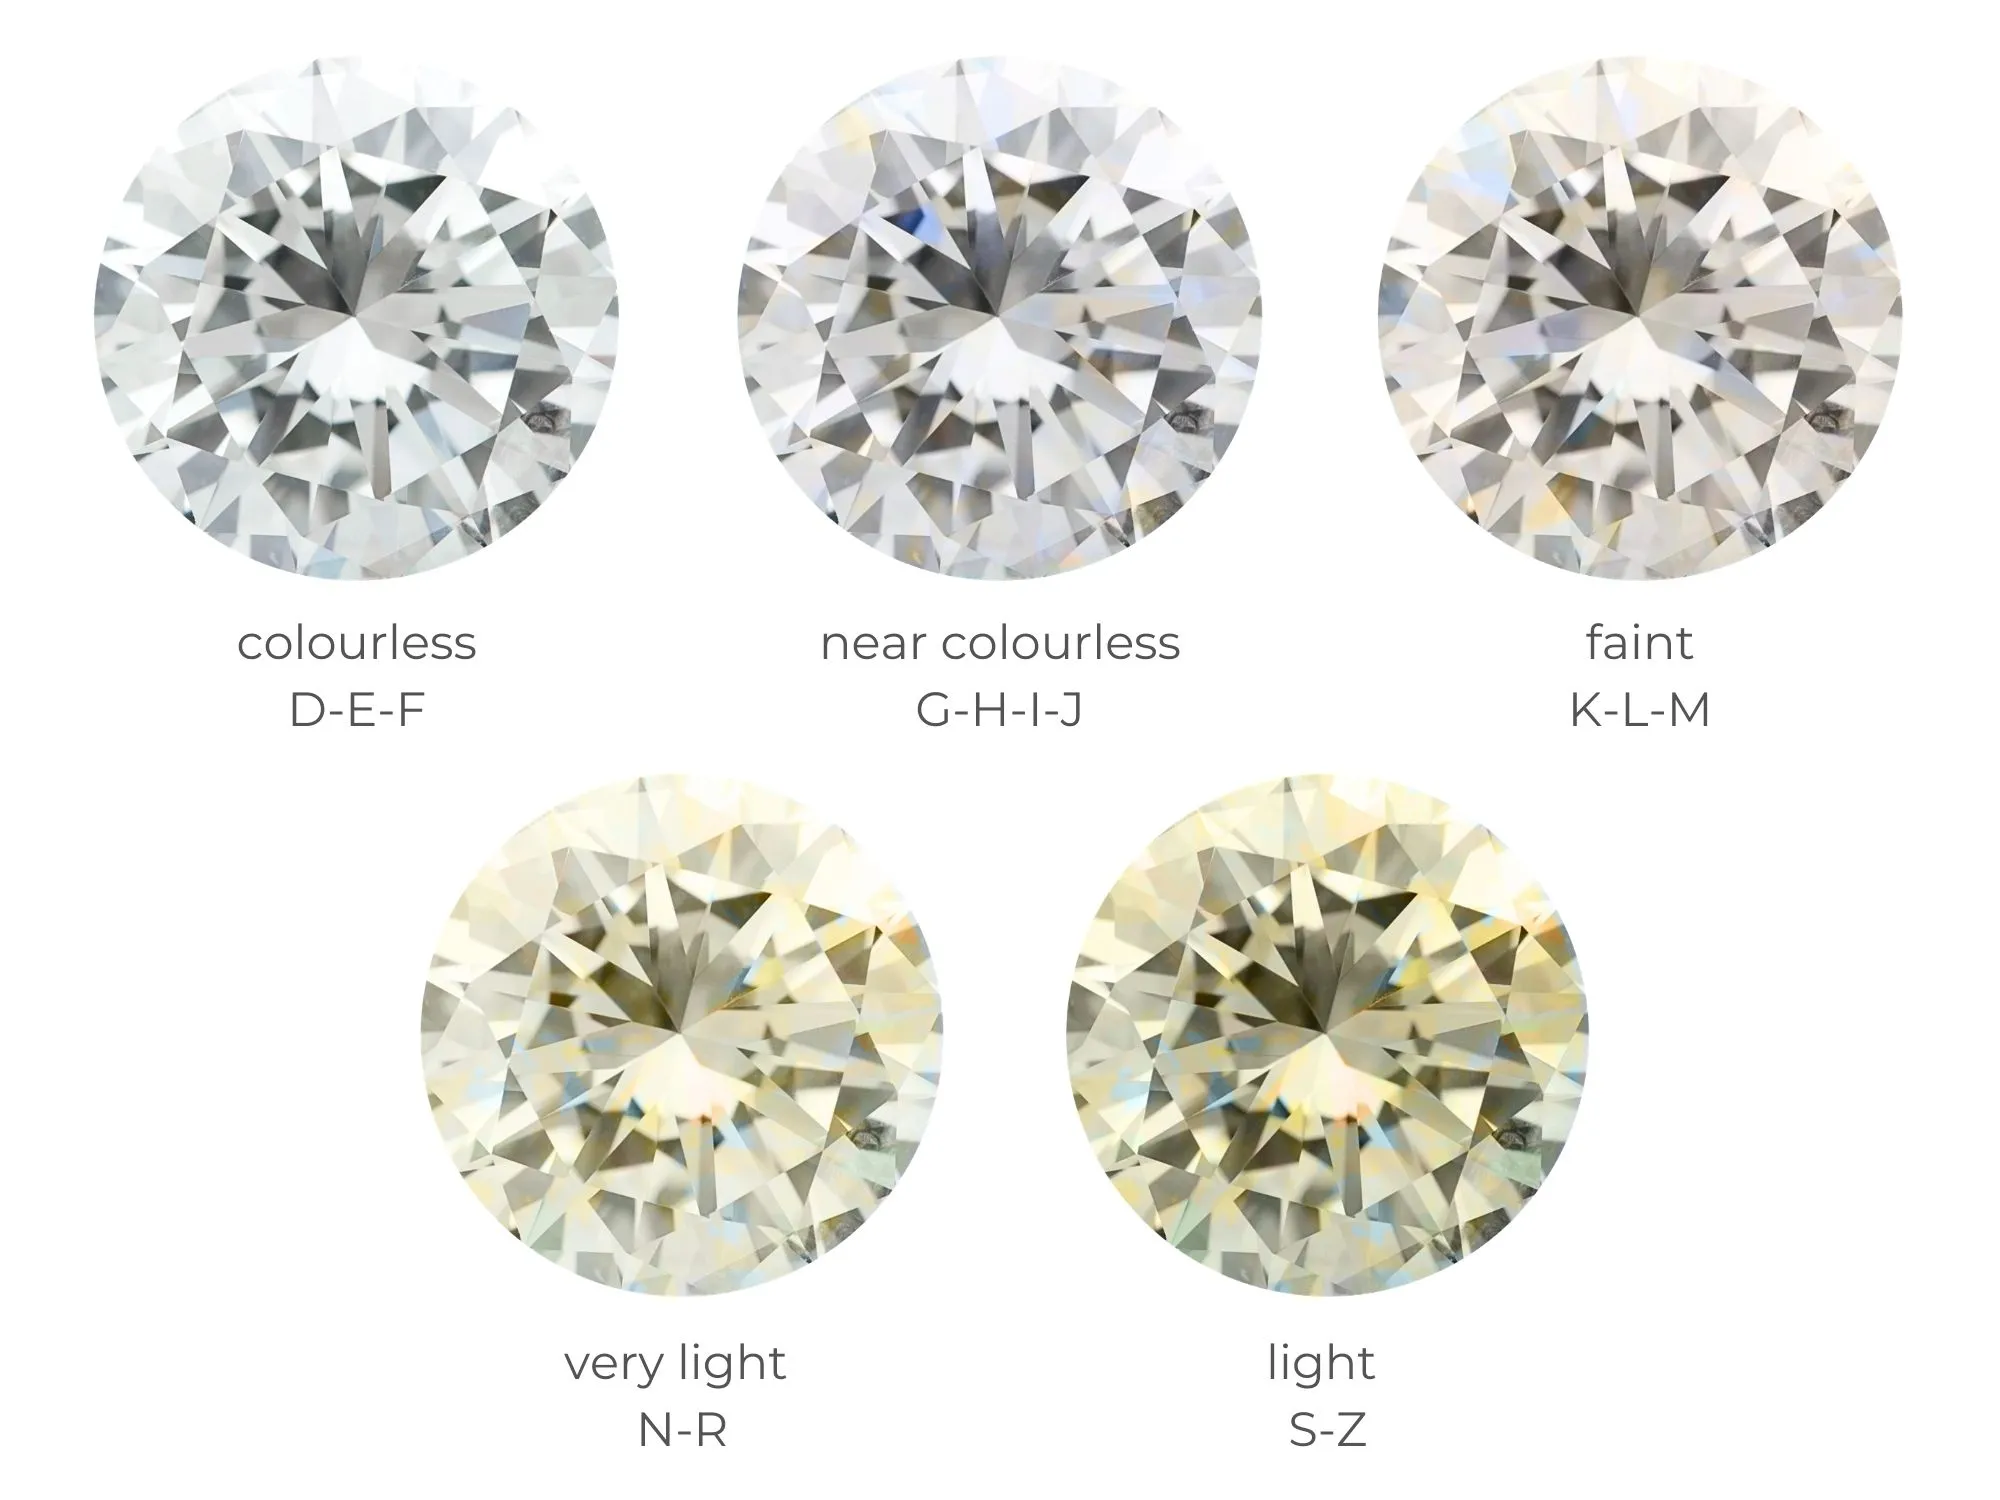

1. **Clarity:** Represents the level of clarity or purity of the gemstone, often graded from Flawless (no inclusions or blemishes) to Included (inclusions or blemishes visible to the naked eye) using GIA's clarity scale.

        It has following values...
        FL - Flawless
        IF - Internally Flawless
        VVS1/VVS2 - Very, Very Slightly Included
        VS1/VS2 - Very Slightly Included
        SI1/SI2 - Slightly Included
        I1/I2/I3 - Included
  clarity.avif

1. **Carat Weight:** Denotes the weight of the gemstone in carats, a standard unit of measurement for gemstones.

1. **Cut Quality:** A more detailed evaluation of the cut, which might include factors like proportions, angles, and other aspects that affect how the gemstone reflects light.

        The GIA assigns the cut of a diamond one of the following grades...
        Excellent (the best grade)
        Very Good
        Good
        Fair
        Poor (the worst grade)

1.  **Lab:** Indicates the laboratory or entity that has graded or certified the gemstone, such as GIA (Gemological Institute of America) or EGL (European Gemological Laboratory).

1. **Symmetry:** Reflects the symmetry of the gemstone's facets, which can influence its overall appearance.

          It has following values...
          Poor, Fair, .... , Very Good

1. **Polish:** Refers to the quality of the gemstone's surface finish, which can impact its luster and appearance.

1. **Eye Clean:** Indicates whether the gemstone appears clean to the naked eye, with no visible inclusions or blemishes.

        It has following values...
        Yes, No, Borderline, E1, unknown

1. **Culet Size:** Describes the size of the culet, a facet on the bottom of the gemstone.

  The GIA includes several different grades for culet size:
  None, Very Small, Small, Medium, Slightly Large, Large, Very Large, Extremely Large
  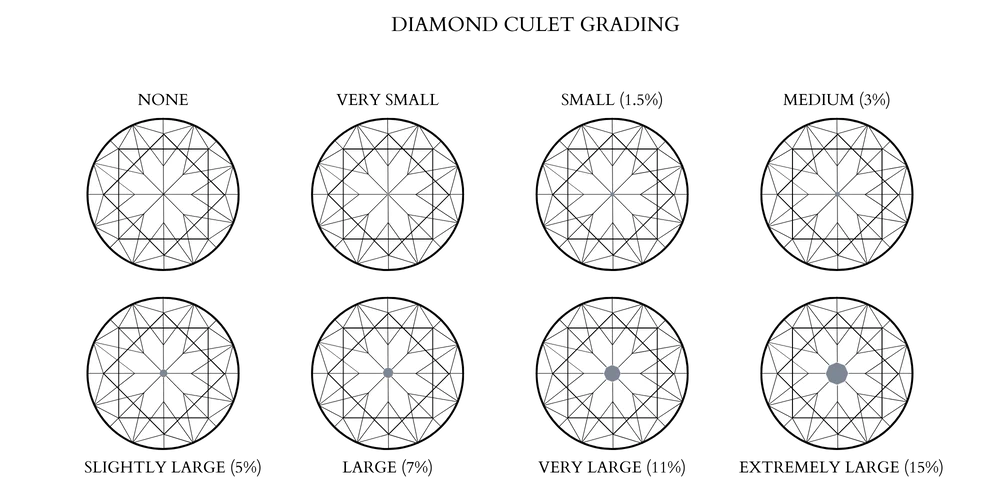

1. **Culet Condition:** Specifies the condition of the culet, which could be chipped or damaged etc.

        Values...
        unknown
        Abraded
        Chipped
        Pointed

1. **Depth Percent:** Represents the depth of the gemstone as a percentage of its overall dimensions.

1. **Table Percent:** Denotes the size of the flat facet on the top of the gemstone as a percentage of its overall dimensions.

1.  **Meas Length, Meas Width, Meas Depth:** The length, width, and depth measurements of the gemstone.

1. **Girdle Min, Girdle Max:** Refers to the minimum and maximum thickness of the girdle, which is the edge where the top and bottom parts of the gemstone meet.

      Girdle thickness is classified into categories ranging from extremely thin to extremely thick.

        In this dataset it has following values..
        M - Medium
        STK - Slightly Thick
        TN - Thin
        TK - Thick
        VTN - Very Thin
        VTK - Very Thick
        XTK - Extremely Thick
        XTN - Extremely Thin
  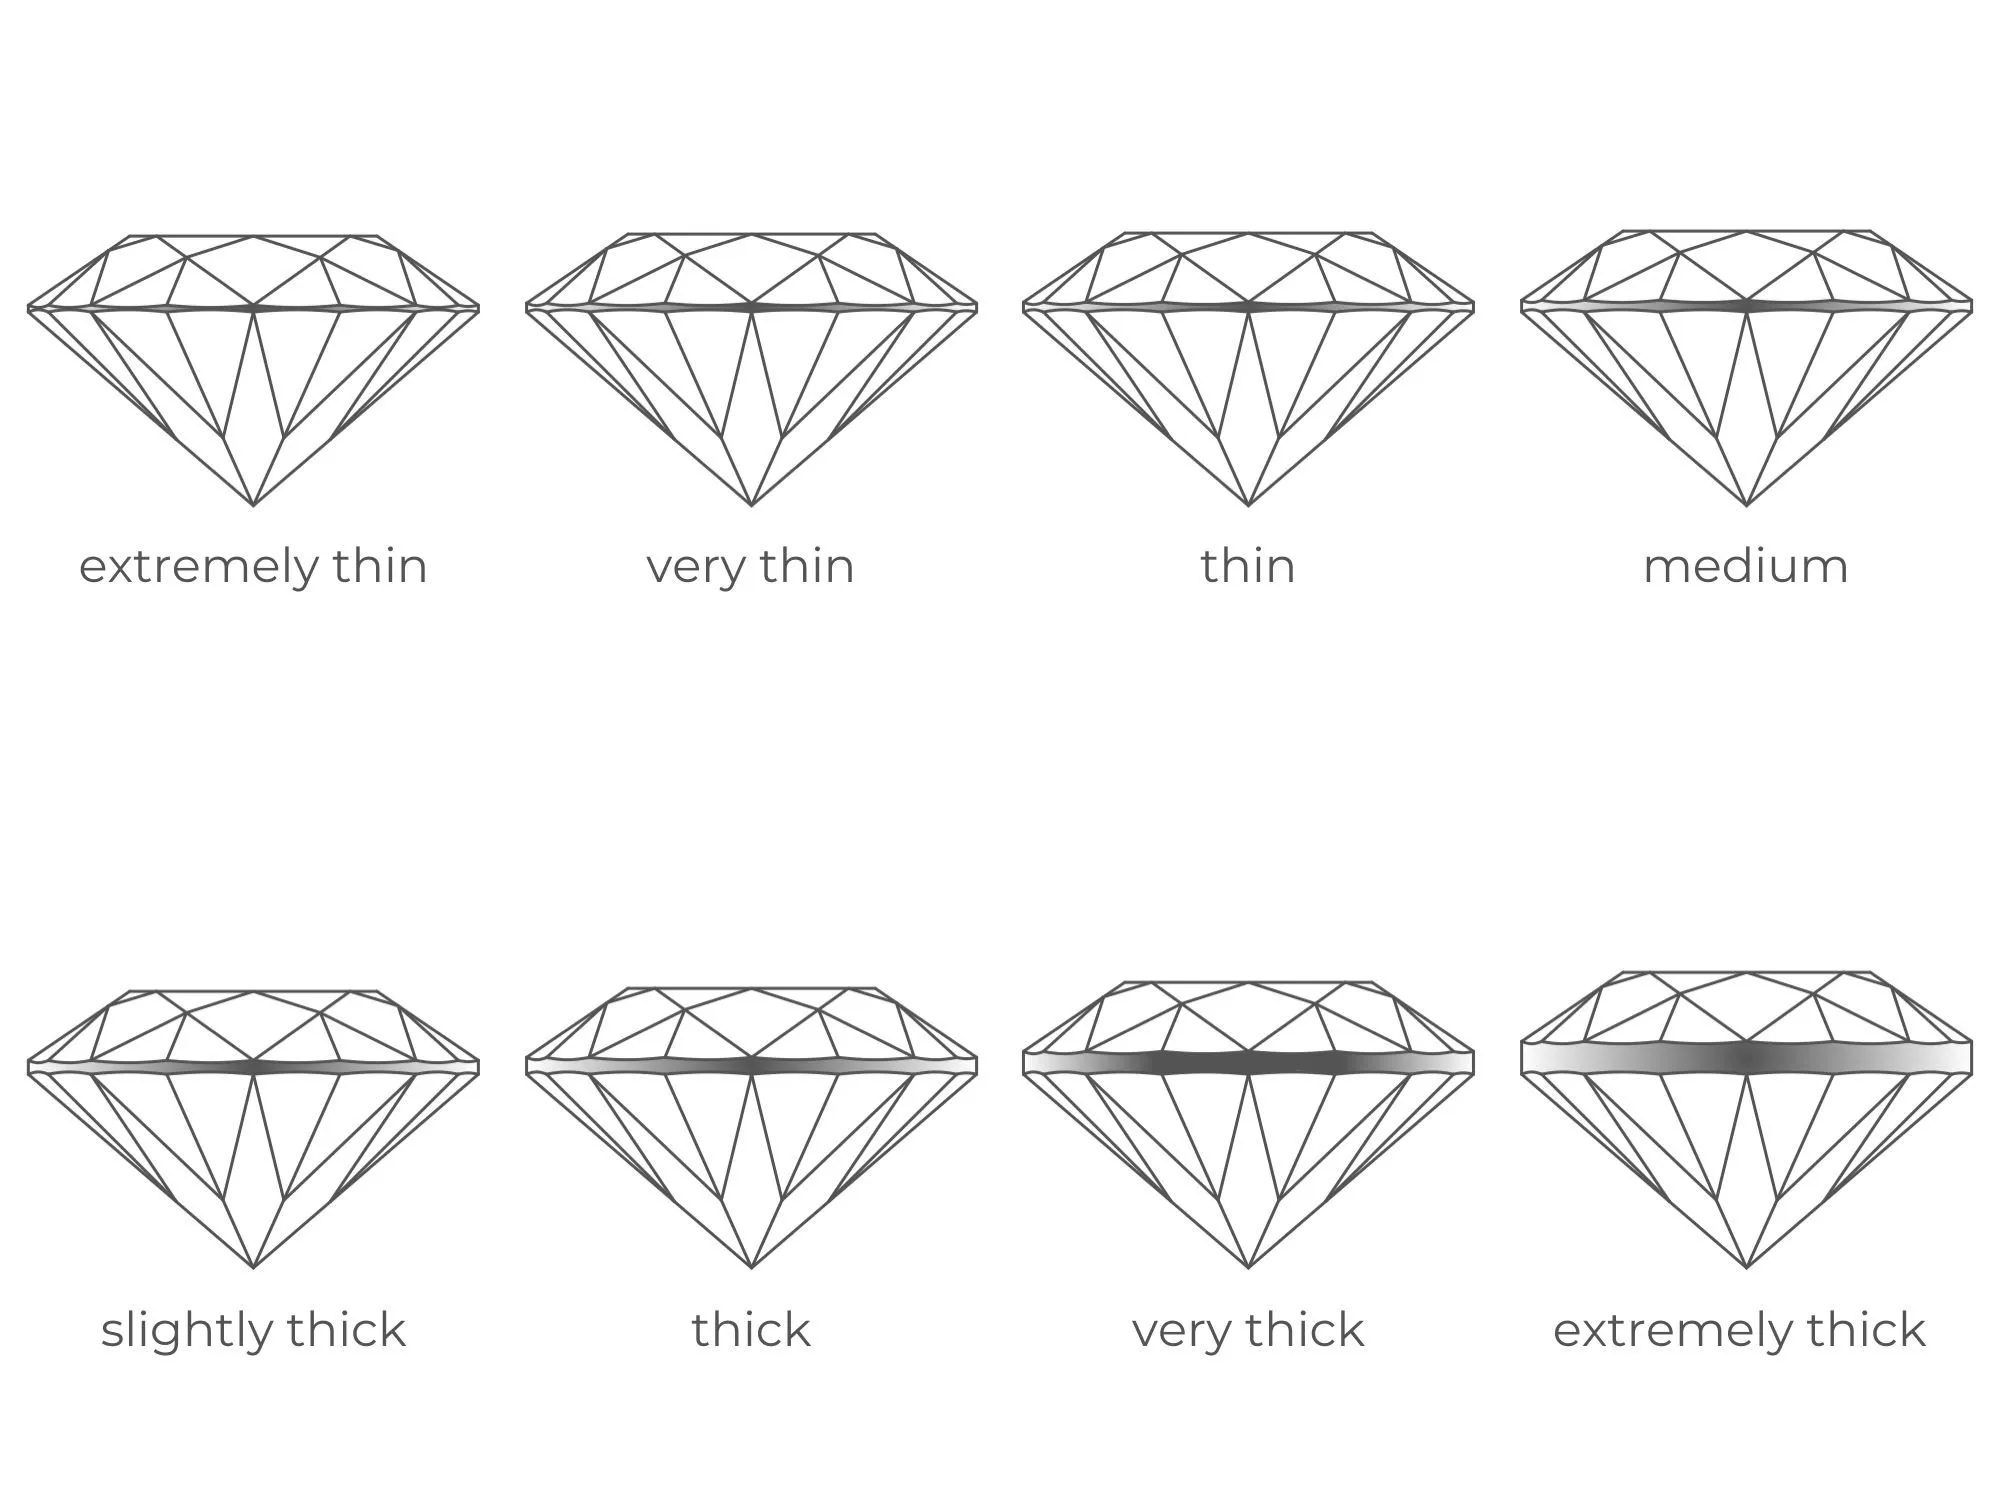

1. **Fluor Color and Fluor Intensity:** Describes any fluorescence observed in the gemstone under ultraviolet (UV) light,including the color and the intensityfluorscence.

  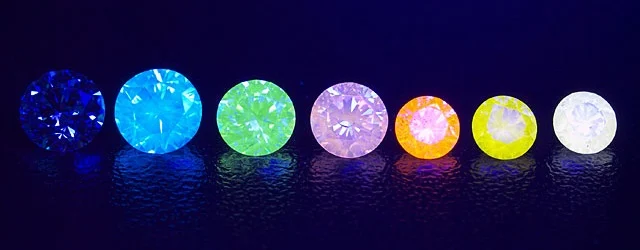
  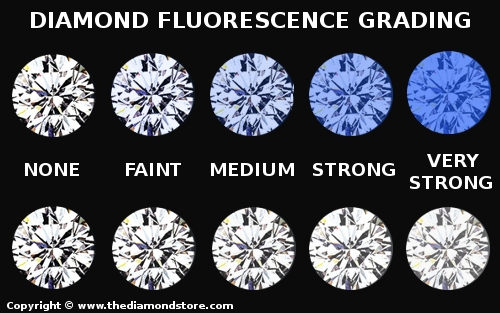
1. **Fancy Color Dominant Color and Secondary Color:** Applicable if the gemstone is a fancy colored diamond, indicating the primary and secondary colors present.

1. **Fancy Color Intensity:** Specifies the intensity or saturation of the fancy color.

        Values...
        Fancy
        Very Light
        Faint
        Fancy Light
        Light
        Fancy Deep
        Fancy Intense
        Fancy Dark
        Fancy Vivid

1. **Total Sales Price:** Represents the total price or value of the gemstone in a given transaction or context
      


#Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('diamonds.csv')
df.drop('Unnamed: 0', axis=1,inplace=True) #Removing first column
df.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [ ]:
df.shape #Format of this function : (Numbers of rows,Number of columns)

(219703, 25)

In [ ]:
df.info() #It Shows the datatype of each attribute and count of null, non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

In [ ]:
df.isnull().sum() #Shows count of Null values of each attribute

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

In [ ]:
df.describe() #It will show summary of numaric attributes like mean, max, min, standard deviation etc..

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [ ]:
df.describe(include='O').T #It will show summary of data which is object(string) type

,count,unique,top,freq
cut,219703,11,Round,158316
color,219703,11,E,33103
clarity,219703,11,SI1,38627
cut_quality,219703,6,Excellent,124861
lab,219703,3,GIA,200434
symmetry,219703,5,Excellent,131619
polish,219703,5,Excellent,175806
eye_clean,219703,5,unknown,156916
culet_size,219703,9,N,131899
culet_condition,219703,4,unknown,204384


>Listing Columns which has Object DataType

In [3]:
categorical_columns = [feature for feature in df.columns if df[feature].dtypes =='O']
categorical_columns

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

>Listing Columns which has Numeric DataType and removing Total_Price from feature

In [4]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes !='O']
numerical_columns.pop(-1)
features=numerical_columns+categorical_columns
features

['carat_weight',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

In [42]:
cols = numerical_columns + categorical_columns
cols

['carat_weight',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

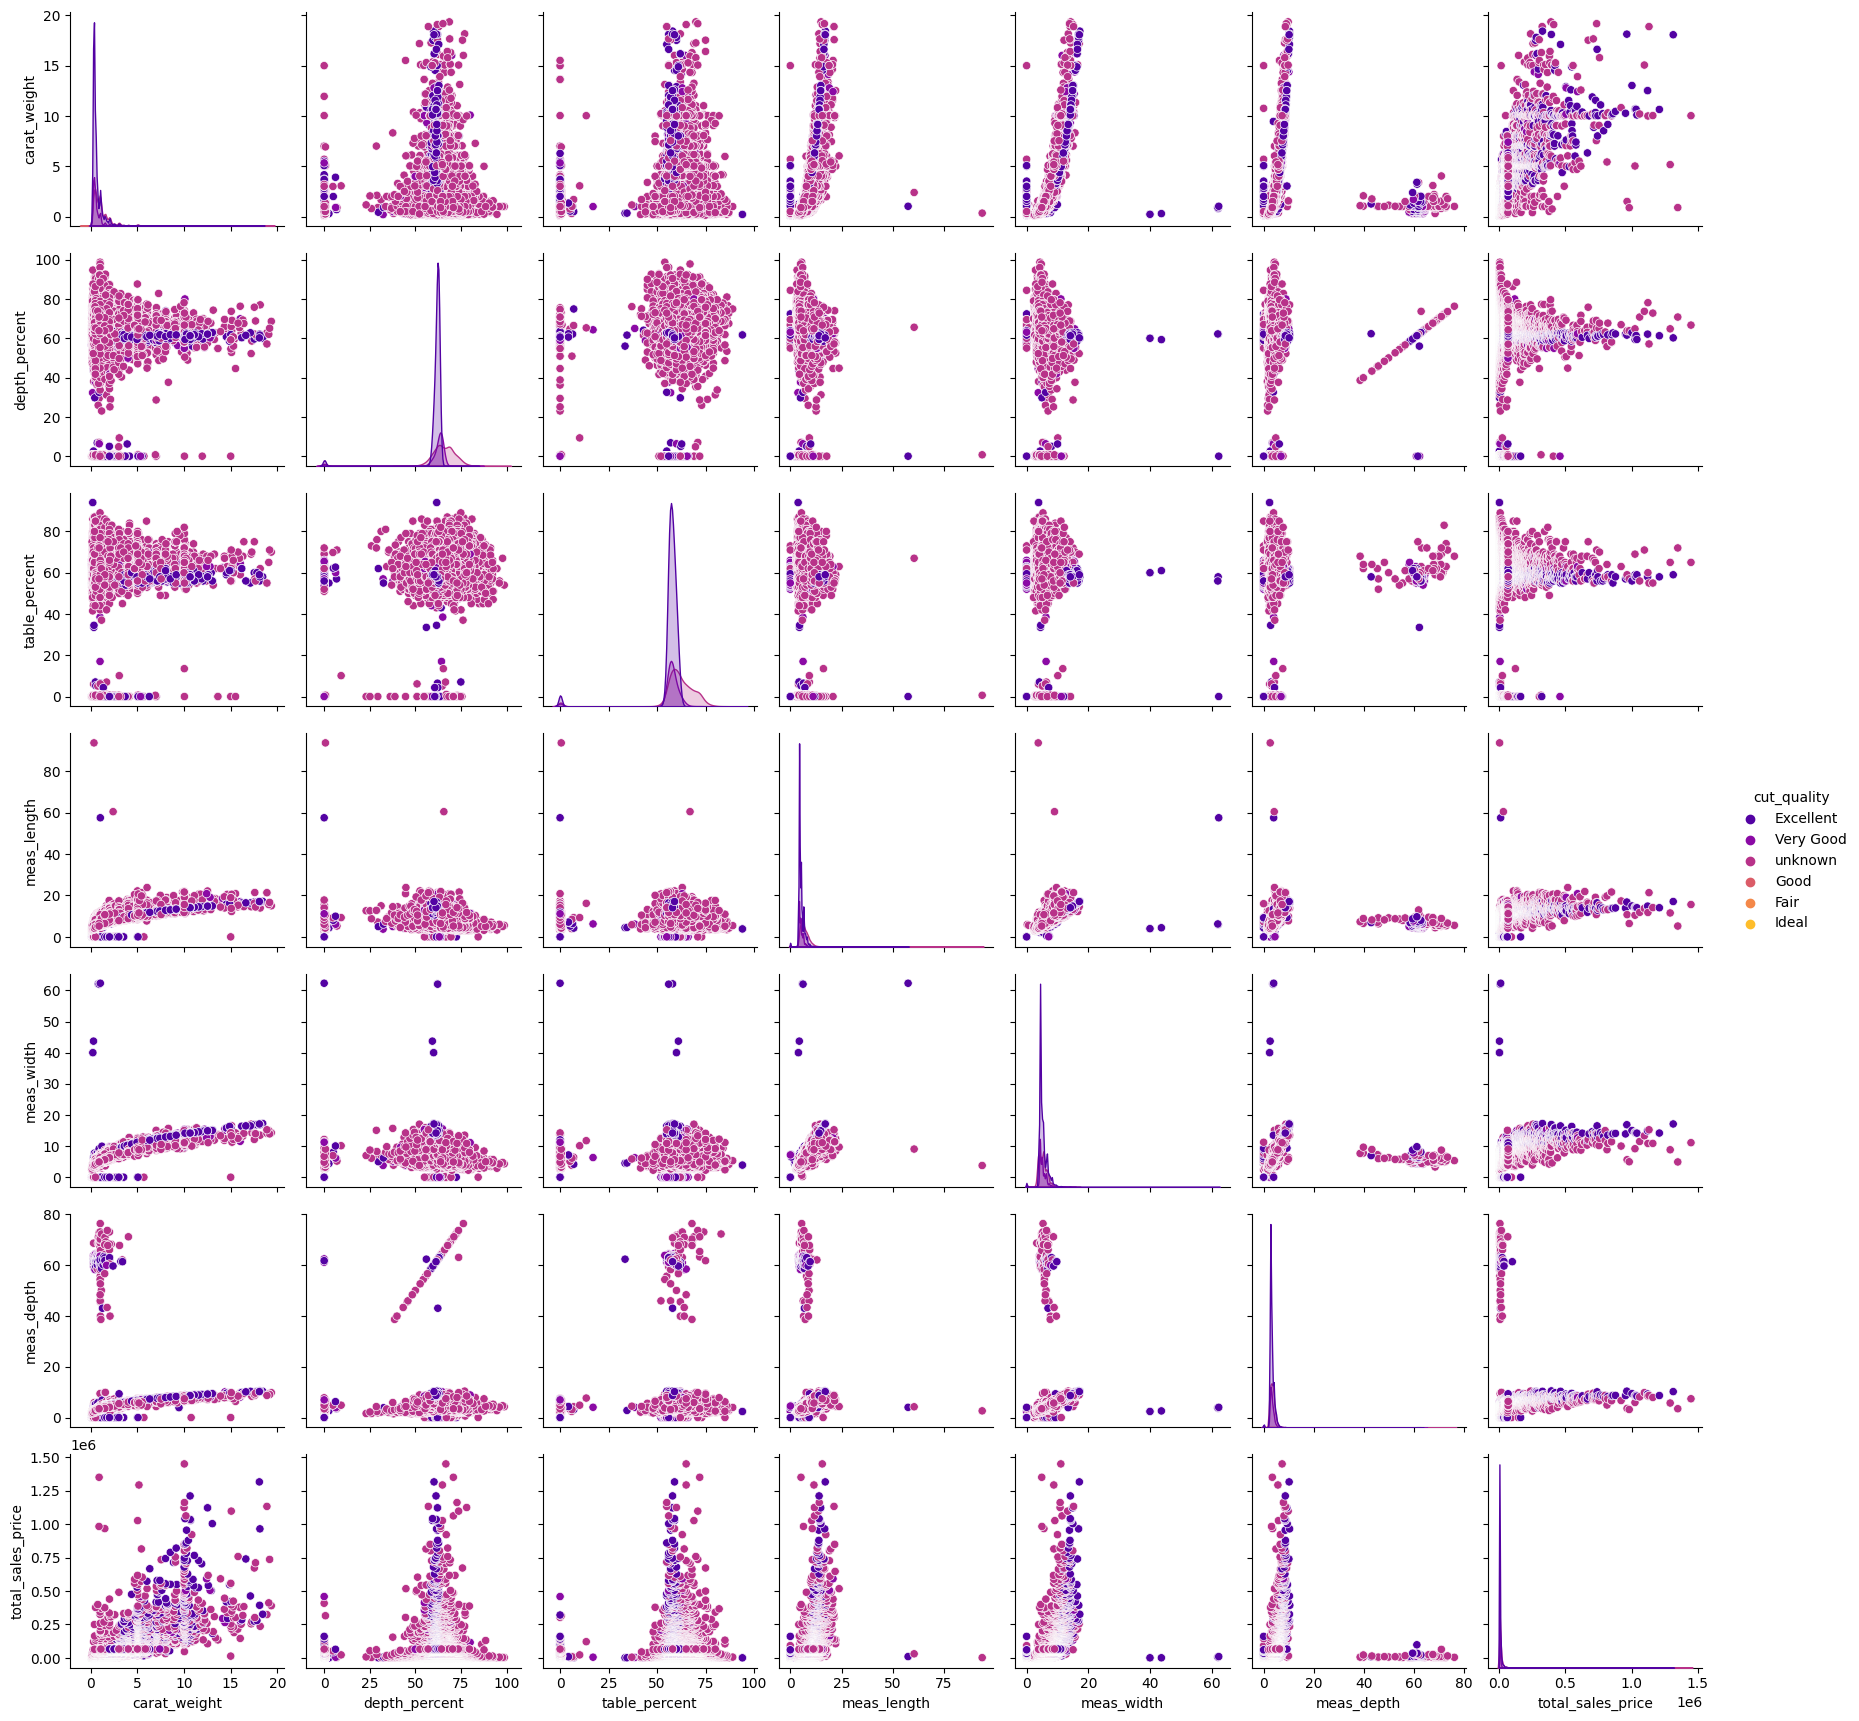

In [ ]:
sns.pairplot(df, hue= "cut_quality" ) #help in visualizing the relationships between features and how they might affect the target variable in future analysis.

Some of the realtions are in linear Relation and some of are in Polinomial Relation.

>**Below is a categorical plot of type 'strip', which helps visualize the data more efficiently. It will display all data points in the graph.**

cut:


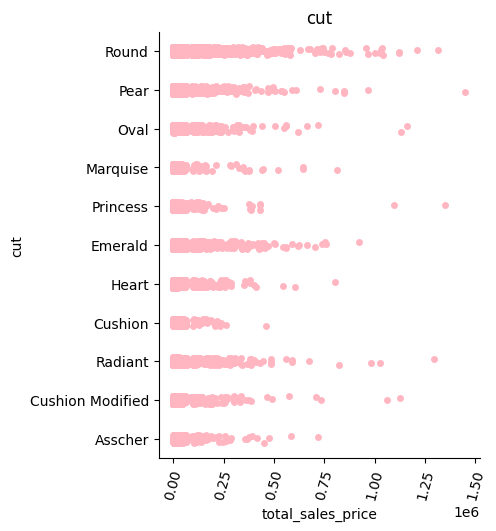

color:


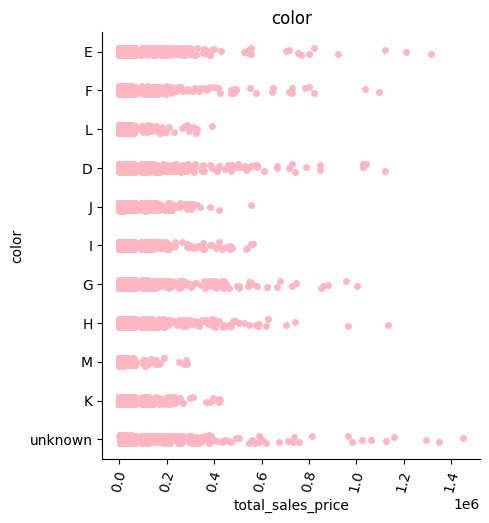

clarity:


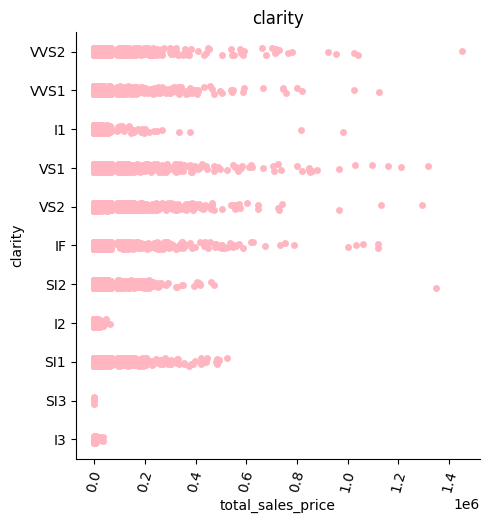

cut_quality:


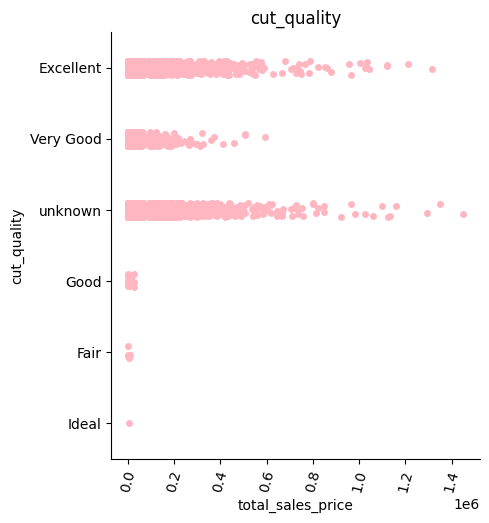

lab:


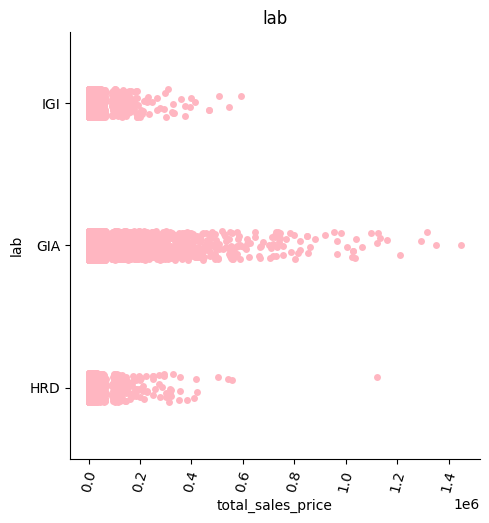

symmetry:


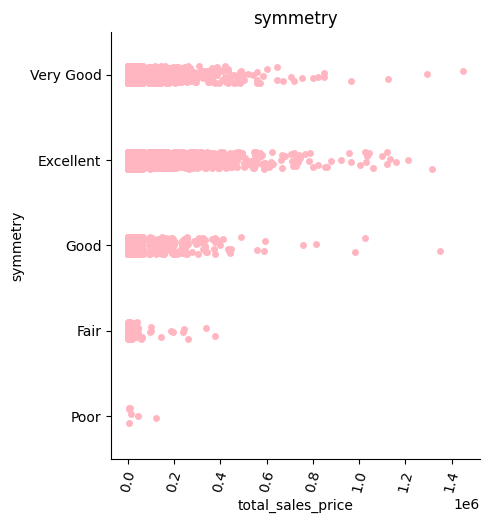

polish:


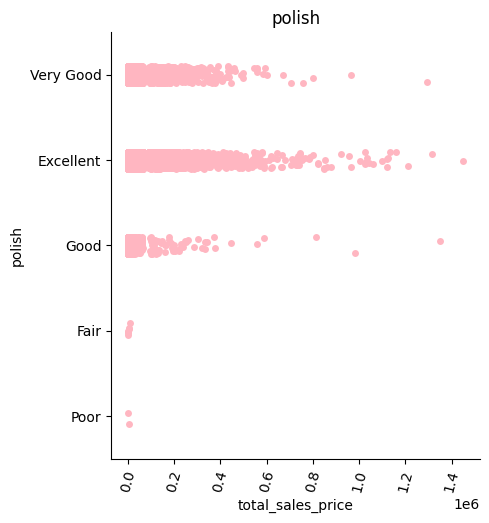

eye_clean:


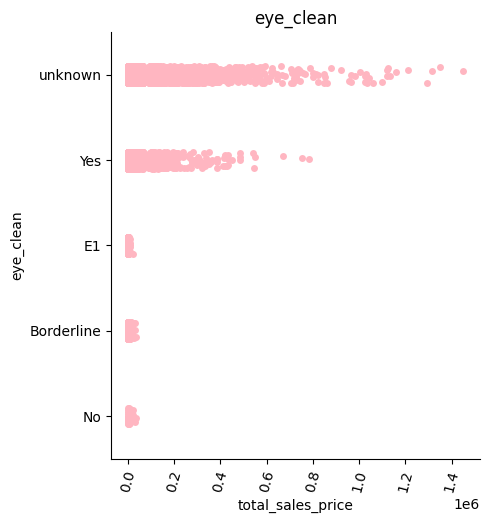

culet_size:


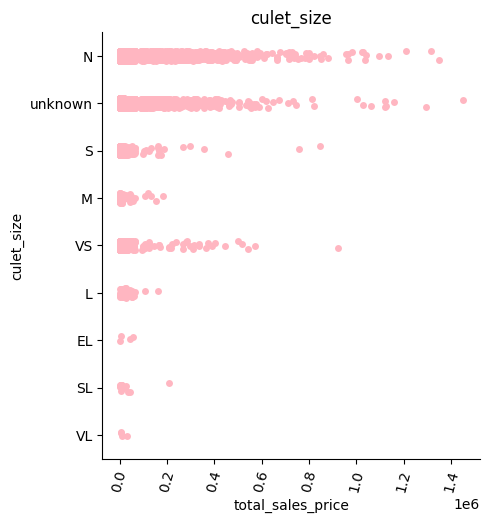

culet_condition:


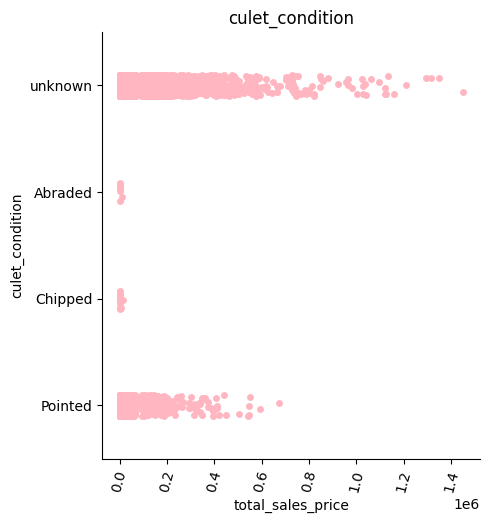

girdle_min:


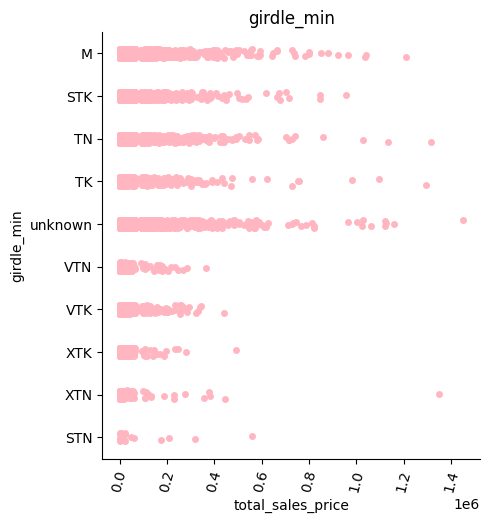

girdle_max:


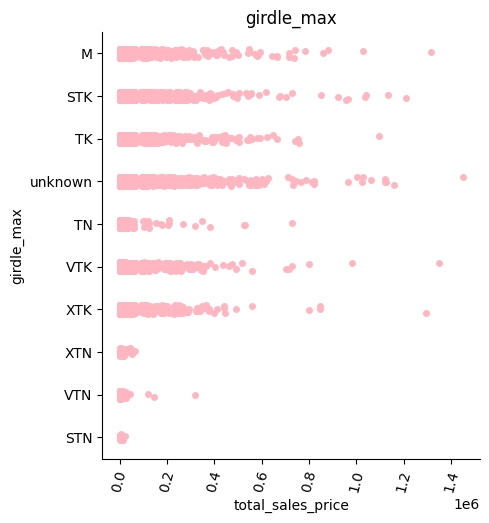

fluor_color:


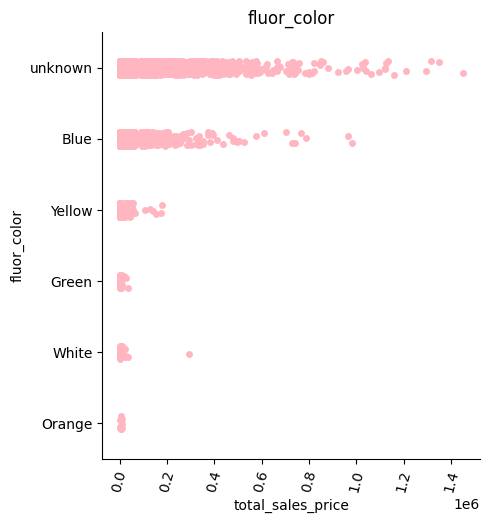

fluor_intensity:


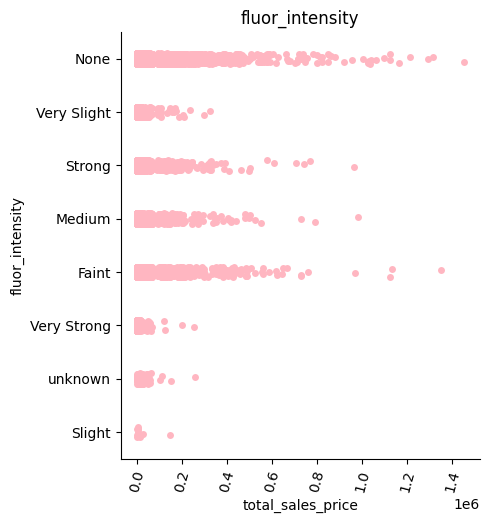

fancy_color_dominant_color:


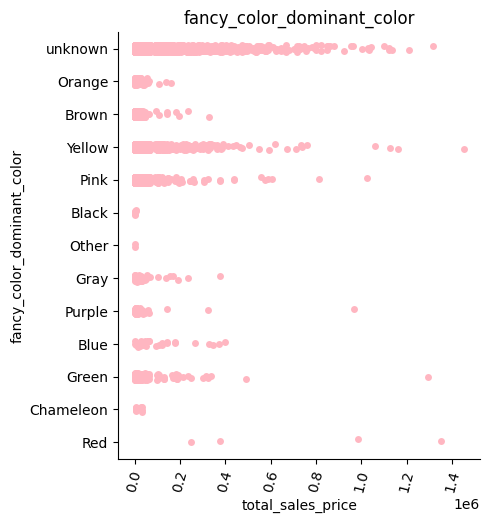

fancy_color_secondary_color:


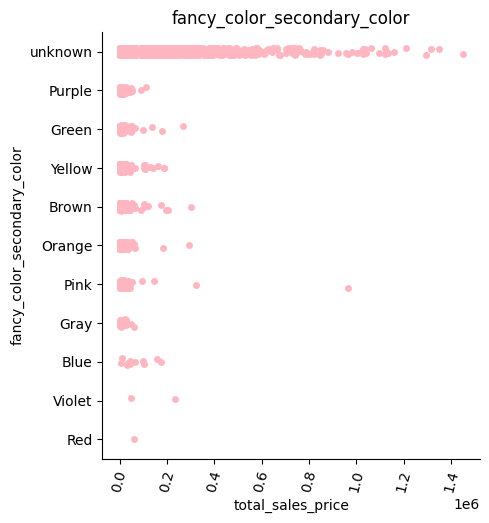

fancy_color_overtone:


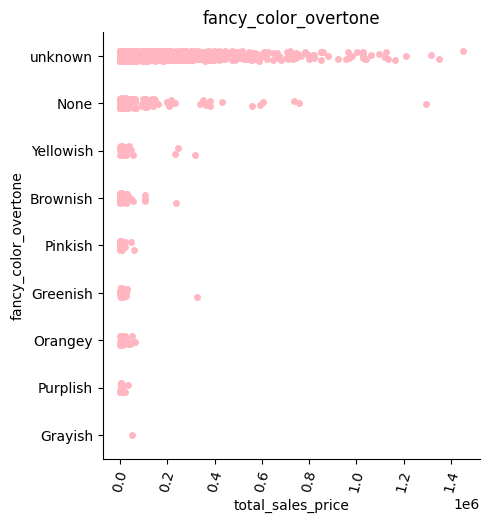

fancy_color_intensity:


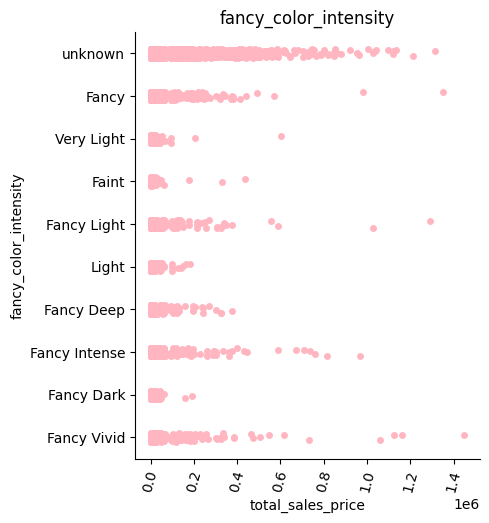

In [ ]:
for cat in categorical_columns:
    sns.catplot(df,x='total_sales_price',y=cat,color='#FFB6C1')
    plt.xticks(rotation=75)
    plt.title(cat)
    print(cat +':')
    plt.show()

>**Probability Distribution Function (PDF) of the numeric attributes**

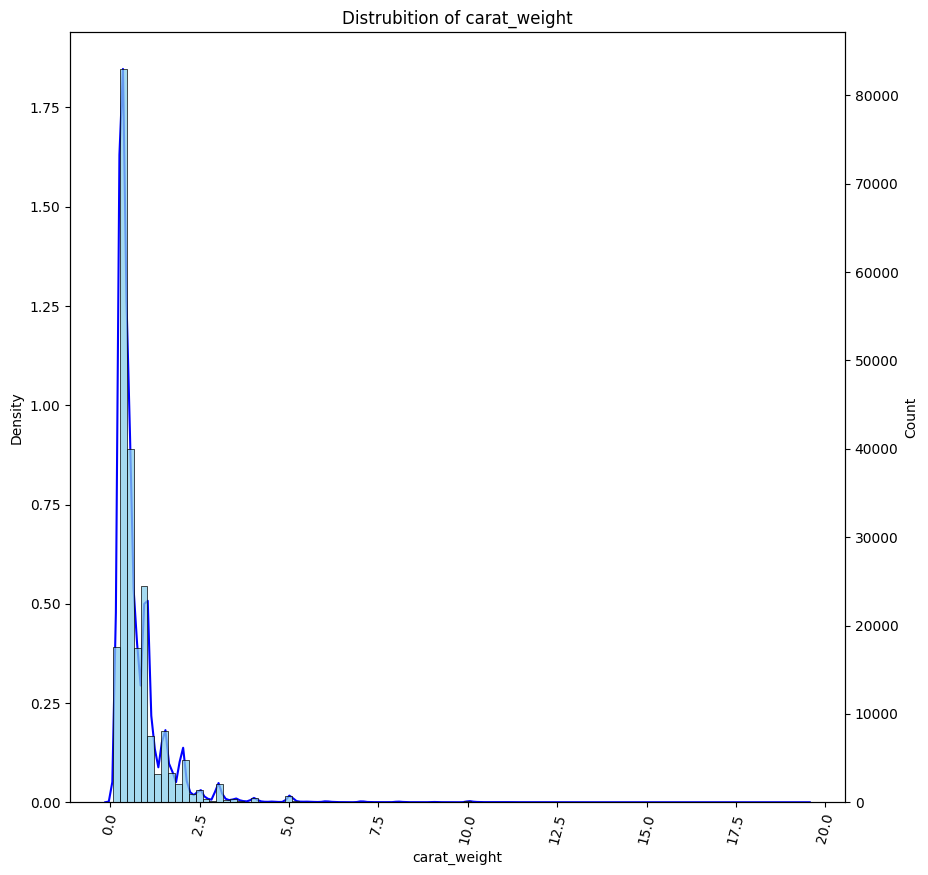

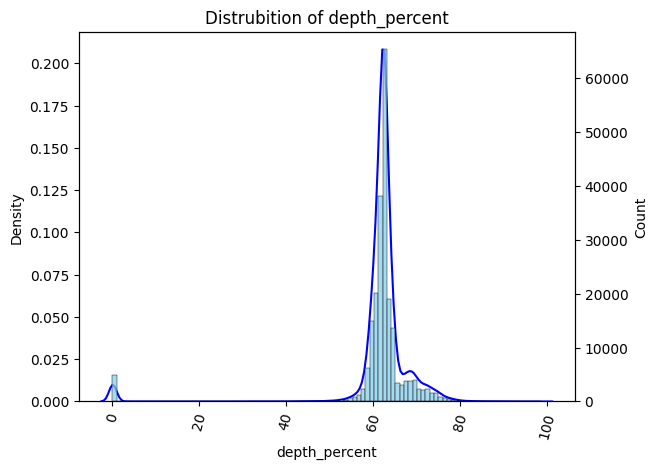

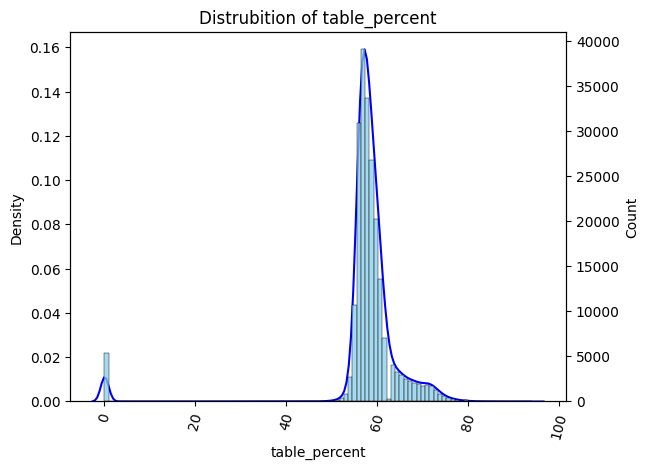

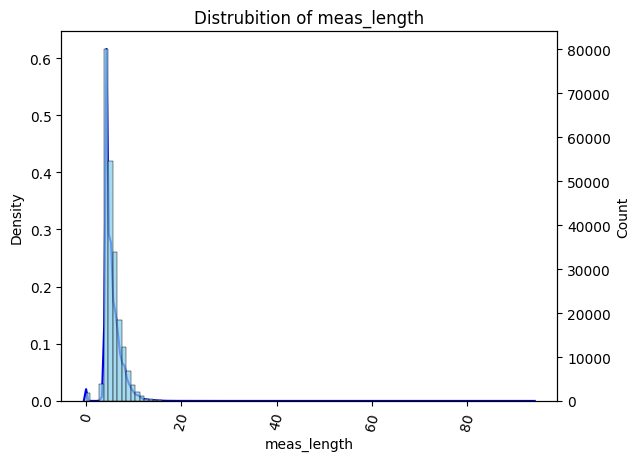

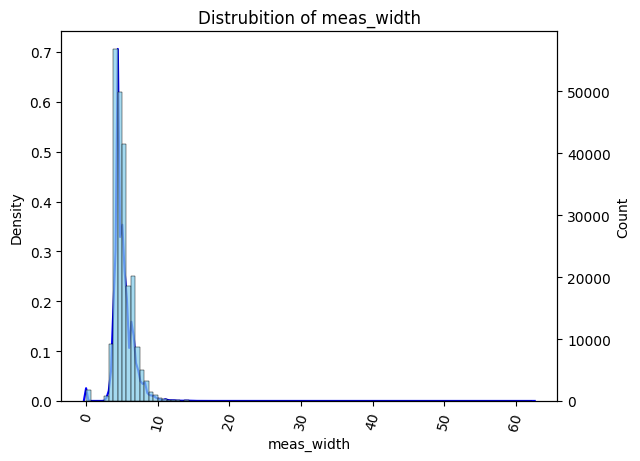

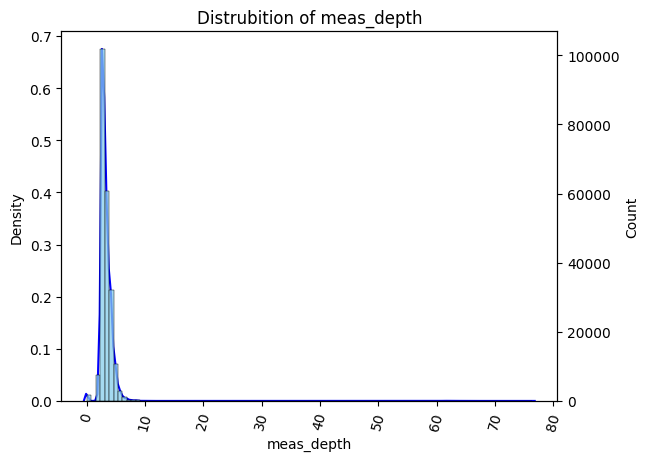

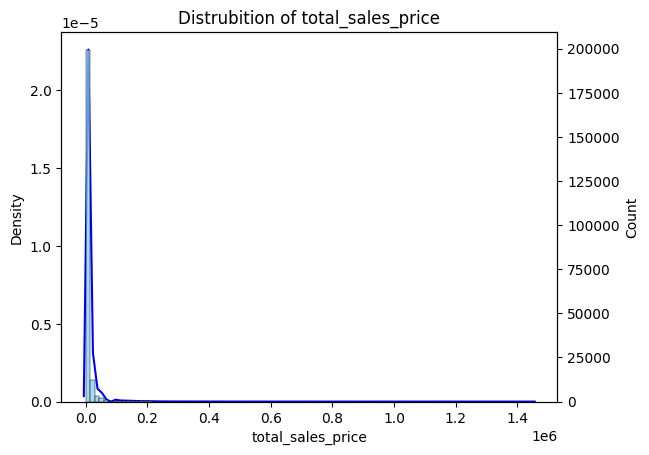

In [ ]:
#It will show the Probability Distribution Function (PDF) of the numeric attributes,
#and the second plot is a histogram of the count of that numeric attribute.
#As shown below, the histogram and the distribution function appear similar
#but are scaled differently.

fig, ax = plt.subplots(figsize=(10,10))
for cat in numerical_columns:
    sns.kdeplot(df,x=cat,color='blue')
    plt.xticks(rotation=75)
    plt.title('Distrubition of {}'.format(cat))
    plt.twinx()
    sns.histplot(data=df, x=cat, bins=100,color=pc[5])
    plt.show()
    print()
sns.kdeplot(df,x='total_sales_price',gridsize=100,color='blue')
plt.title('Distrubition of total_sales_price')
plt.twinx()
sns.histplot(data=df, x='total_sales_price', bins=100,color=pc[5])
plt.show()

This way we can analyse the data where the most of the data are and where the least data are.

##Let's See some of the Outliers and should we remove it or not ?

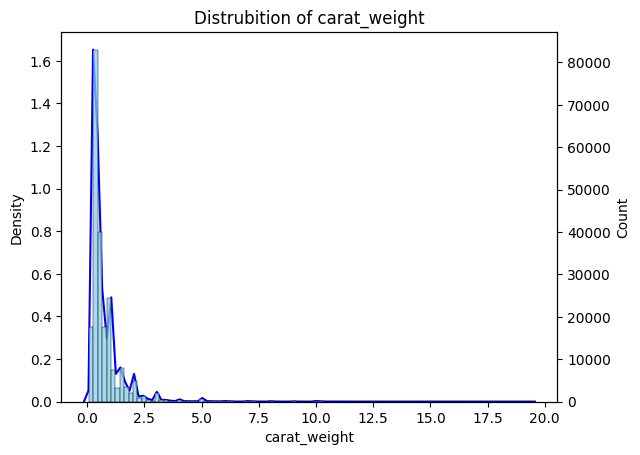

In [ ]:
sns.kdeplot(df,x='carat_weight',gridsize=100,color='blue')
plt.title('Distrubition of carat_weight')
plt.twinx()
sns.histplot(data=df, x='carat_weight', bins=100,color=pc[5])
plt.show()

As per the above graph, we can see there are some data points for selling prices greater than 10. These might seem like outliers, but they are not because some people, like celebrities and influencers, are interested in buying at these prices. Therefore, we cannot consider them as outliers in this case.

In [ ]:
#Count of Data Contribution/Participation In Lab Attribute
lab_dist = df["lab"].value_counts()
lab_dist

lab
GIA    200434
IGI     15865
HRD      3404
Name: count, dtype: int64

In [ ]:
#Count of Data Contribution/Participation In Color Attribute
color_dist = df["color"].value_counts()
color_dist

color
E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: count, dtype: int64

In [ ]:
#Count of Data Contribution/Participation In Clarity Attribute
clarity_dist = df["clarity"].value_counts()
clarity_dist

clarity
SI1     38627
VS2     38173
VS1     36956
SI2     31105
VVS2    28985
VVS1    27877
IF       9974
I1       6961
I2        944
I3         91
SI3        10
Name: count, dtype: int64

In [ ]:
cut_dist = df["cut"].value_counts()
cut_dist

cut
Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: count, dtype: int64

>**Below is a pie chart of these attributes, showing the percentage of their contribution:**



<Axes: ylabel='cut'>

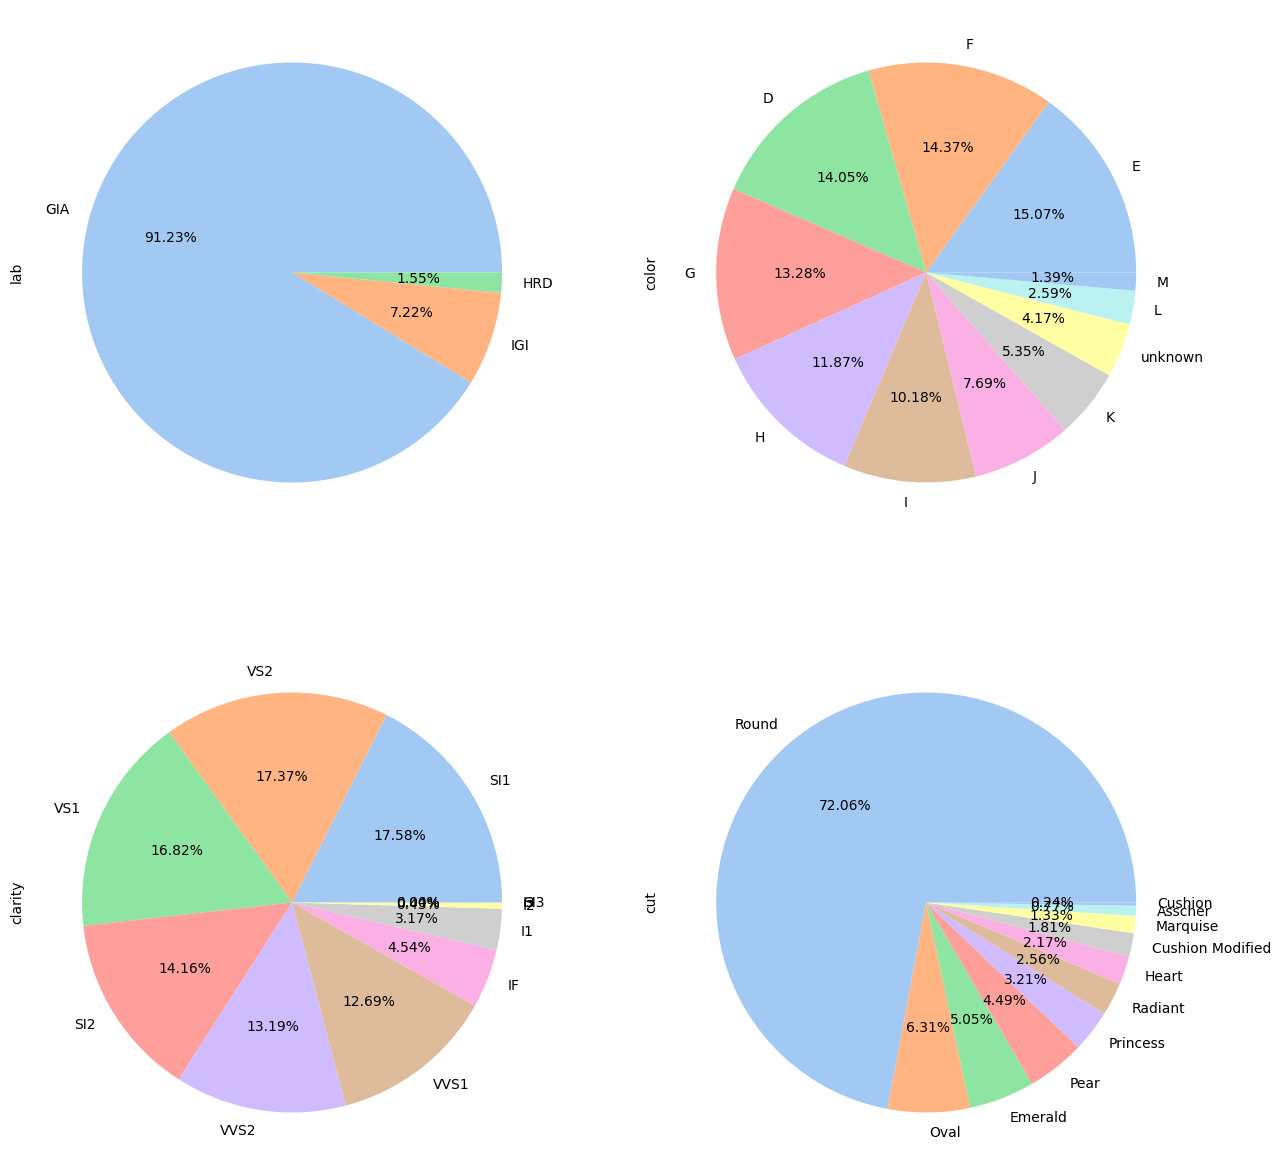

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
piec_colors = sns.color_palette('pastel')[0:len(lab_dist)]
lab_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 2)
piec_colors = sns.color_palette('pastel')[0:len(color_dist)]
color_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 3)
piec_colors = sns.color_palette('pastel')[0:len(clarity_dist)]
clarity_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
plt.subplot(2, 2, 4)
piec_colors = sns.color_palette('pastel')[0:len(cut_dist)]
cut_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')


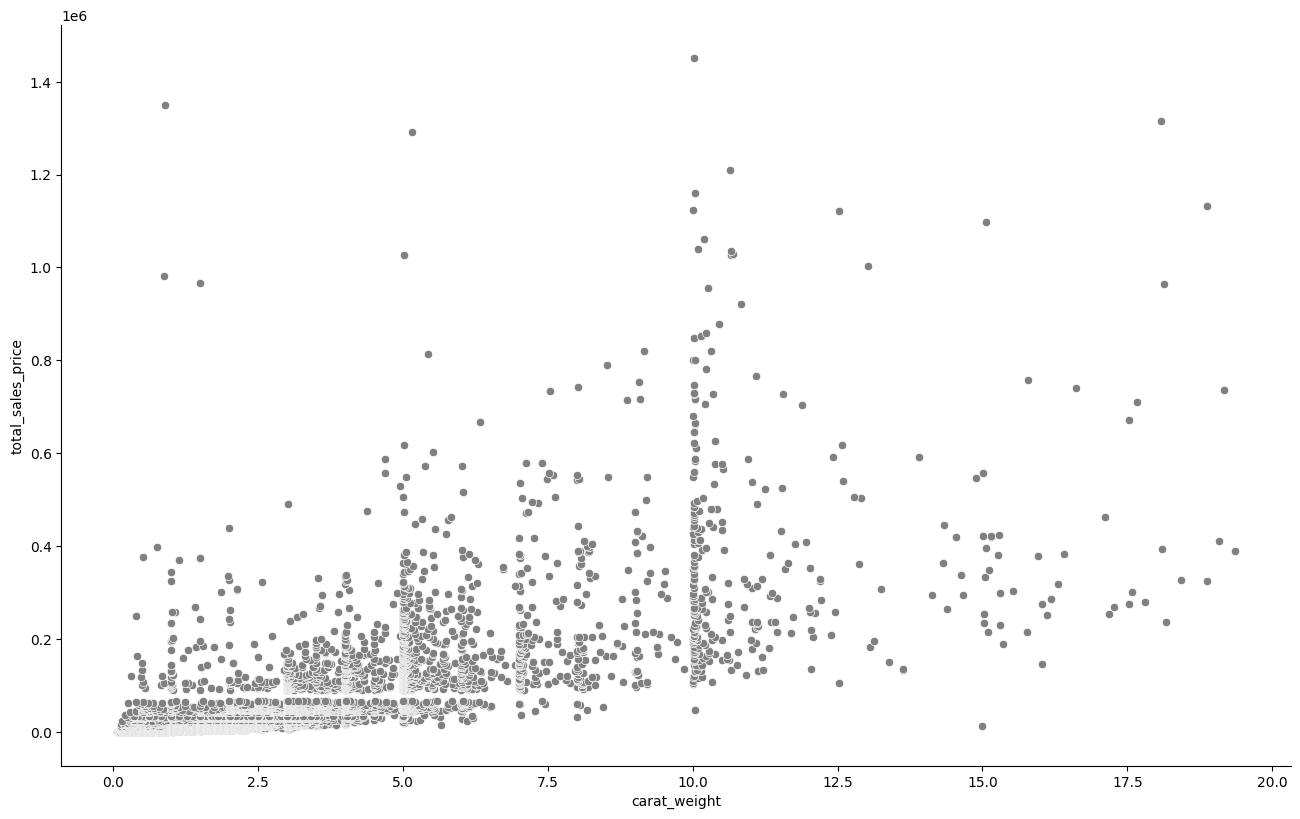

In [ ]:
f = sns.relplot( data=df, x="carat_weight", y="total_sales_price",color='grey')
f.figure.set_size_inches(15, 9)

Based on the above graph, we can observe specific points where certain carat weights are more popular. For example, customers prefer to buy diamonds with a carat weight of 2.5 more than those with a carat weight of 2.2. We can see this preference for specific decimal values clearly in the graph. This pattern also applies to price points, as indicated by the visible blank line at $1000.

In [ ]:
gap_analysis = df.loc[df['total_sales_price'].between(0, 25000)]

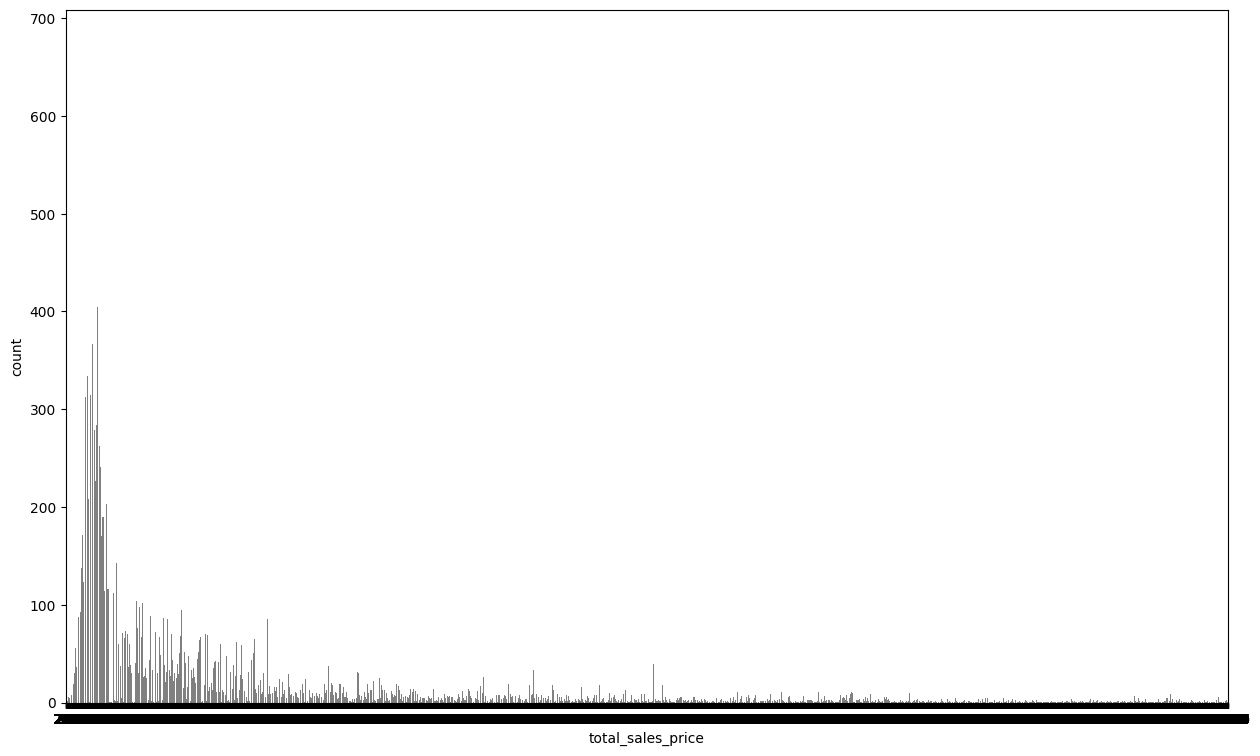

In [ ]:
f = sns.countplot(data=gap_analysis, x='total_sales_price', color='grey')
f.figure.set_size_inches(15, 9)

In the above graph, we have considered prices between $0 and $25,000. Within this price range, there are some gaps, indicating that diamonds at certain prices are not being sold. These gaps suggest that customers prefer to buy diamonds at specific price points.

#Key Attributes for Regression Model Predictions



- **Total sales price prediction**: Predicting the total_sales_price of a diamond is valuable beacuse it is depended on cut quality, color, clarity, Symmetry and Polish. Simply it relies on every attribute

- **carat_weight prediction**: carat weight is function of length, width and depth of the diamond.

- **table percent**: table percent is function of table width and diameter of diamond. So it can be predicted easily.

**Which one does seem the most interesting to you and why?**

Predicting the total_sales_price of a diamond is valuable beacuse it is depended on cut quality, color, clarity, Symmetry and Polish. Comparatively total_sales_price relies on every attribute. Total sales price seems most interesting because it allows buyers to make informed purchasing decisions based on price expectations. Sellers can use it to set competitive prices, and investors can assess the potential return on investment in diamonds. Prediction of total sales price helps assess risk in diamond transactions. It can be used to evaluate whether a seller is offering a fair price for a diamond based on its characteristics. If you are in the business of buying or selling diamonds, regression models can help you optimize pricing strategies. Utilizing regression analysis to predict total sales price can give your business a competitive advantage by offering pricing that reflects market dynamics and the value of individual diamonds accurately. And as per the corealtion figure we can see the most relation between the numeric attribute till now is two attributes one is Total_sales_price and second one is carat_weight but carat_weight is direct function of meas_length*meas_width*meas_depth/166 so that will be the and feature diriving from feature and that would be diract solution and that is not a problem. Anf in other hand Total_sales_price is depending on many condition(Attribute) so that would a problem to solve.

#Preprocessing and Transformation

In [5]:
df['volume'] = (df['meas_length']*df['meas_width']*df['meas_depth'])
df['volume']

0           14.641305
1           14.609528
2           14.783040
3           14.661504
4           14.370174
             ...     
219698    1726.551128
219699     581.023905
219700    2975.605200
219701      88.755660
219702    1279.319111
Name: volume, Length: 219703, dtype: float64

>**Now let us map the values of categorical attribute to numeric values.**

We have following categorical attributes...

 cut, color, clarity, cut_quality, lab, symmetry, polish, eye_clean, culet_size, culet_condition, girdle_min, girdle_max, fluor_color, fluor_intensity, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for cat in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(list(df[cat]))
    df[cat+'_pre'] = df[cat].apply(lambda x: le.transform([x])[0])
    print(df[[cat, cat + '_pre']])

             cut  cut_pre
0          Round       10
1          Round       10
2          Round       10
3          Round       10
4          Round       10
...          ...      ...
219698     Round       10
219699   Radiant        9
219700     Round       10
219701  Princess        8
219702      Pear        7

[219703 rows x 2 columns]
          color  color_pre
0             E          1
1             E          1
2             E          1
3             E          1
4             E          1
...         ...        ...
219698        E          1
219699  unknown         10
219700        E          1
219701  unknown         10
219702  unknown         10

[219703 rows x 2 columns]
       clarity  clarity_pre
0         VVS2           10
1         VVS2           10
2         VVS2           10
3         VVS2           10
4         VVS2           10
...        ...          ...
219698     VS1            7
219699     VS2            8
219700     VS1            7
219701     SI2            5
21

>**Now Let us find the correlation among features**


In [7]:
#select only numeric columns
data_df = df[['carat_weight', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth','fancy_color_intensity_pre', 'fancy_color_overtone_pre',
       'fancy_color_secondary_color_pre', 'fancy_color_dominant_color_pre',
       'girdle_max_pre', 'fluor_intensity_pre', 'fluor_color_pre',
       'girdle_min_pre', 'culet_condition_pre', 'cut_pre', 'color_pre',
       'clarity_pre', 'cut_quality_pre', 'lab_pre', 'symmetry_pre',
       'polish_pre', 'eye_clean_pre', 'culet_size_pre']]

<Axes: >

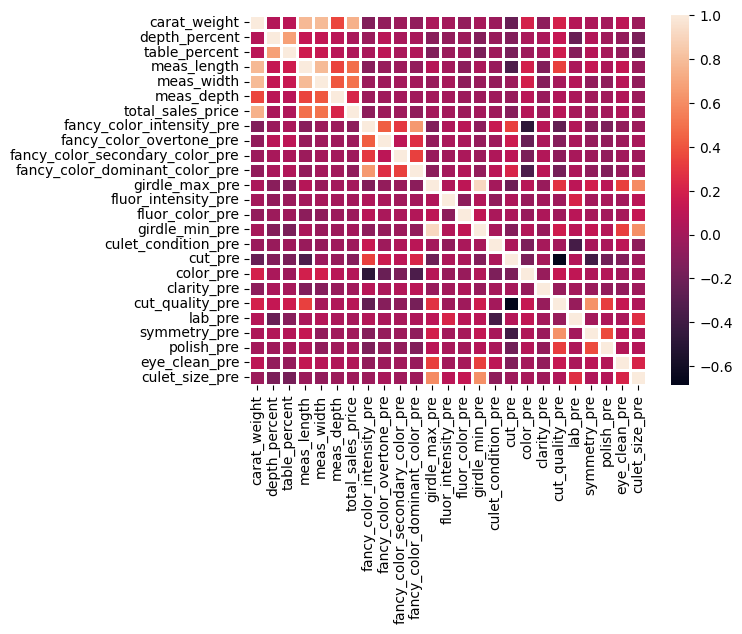

In [ ]:
#heatmap
new_df = df[['carat_weight', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth','total_sales_price',
       'fancy_color_intensity_pre', 'fancy_color_overtone_pre',
       'fancy_color_secondary_color_pre', 'fancy_color_dominant_color_pre',
       'girdle_max_pre', 'fluor_intensity_pre', 'fluor_color_pre',
       'girdle_min_pre', 'culet_condition_pre', 'cut_pre', 'color_pre',
       'clarity_pre', 'cut_quality_pre', 'lab_pre', 'symmetry_pre',
       'polish_pre', 'eye_clean_pre', 'culet_size_pre']]
sns.heatmap(data=new_df.corr(), lw = 1)

Significant correlation of total_sales_price with carat_weight, meas_length, meas_width, meas_depth.

We can see that carat_weight is highly correlated with meas_length, meas_width, meas_depth, total_sales_price.


>**Let us now split the dataset into train-val-test sets**



Also We normalize the data to range [-1, 1].

We divide the dataset in two sets.

Training set which is 80% of the dataset

Test set which is of 20%

In [8]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data_df, df["total_sales_price"], random_state=42, test_size=0.20)

In [9]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((175762, 24), (43941, 24))

In [10]:
X_train_scaled

array([[-6.45174943e-01,  4.13723016e-02,  2.41819523e-02, ...,
        -4.97433847e-01,  5.97113628e-01,  1.23995298e+00],
       [-5.38654132e-01,  2.53673161e-01,  1.24922295e-01, ...,
        -4.97433847e-01, -1.41933084e+00,  1.23995298e+00],
       [-2.90105573e-01,  7.38932267e-01,  7.29364351e-01, ...,
         2.03335705e+00, -1.41933084e+00,  1.23995298e+00],
       ...,
       [ 1.12306380e-01,  1.49714962e+00,  5.27883666e-01, ...,
         7.67961603e-01, -1.41933084e+00, -8.09887836e-01],
       [-2.78269927e-01,  1.12139255e-01, -1.77298733e-01, ...,
        -4.97433847e-01,  5.97113628e-01, -8.09887836e-01],
       [-3.01941219e-01,  9.34042748e-04,  3.26402981e-01, ...,
        -4.97433847e-01, -1.41933084e+00, -8.09887836e-01]])

In [11]:
X_test_scaled

array([[ 0.28984107,  0.18290621, -0.17729873, ..., -0.49743385,
         0.59711363, -0.80988784],
       [-0.51498284,  0.02115317,  0.1249223 , ..., -0.49743385,
        -1.41933084,  1.23995298],
       [ 0.28984107, -0.23158595,  0.32640298, ..., -0.49743385,
         0.59711363,  1.23995298],
       ...,
       [ 1.13017191,  0.71871314,  1.53528709, ...,  2.03335705,
         0.59711363, -0.80988784],
       [-0.53865413,  0.09192013, -0.07655839, ..., -0.49743385,
        -1.41933084, -0.80988784],
       [-0.00605008,  0.16268708, -5.81875793, ..., -0.49743385,
         0.59711363,  1.23995298]])

# Regression Model building

In [37]:
 score_type = ["neg_mean_absolute_error", "neg_mean_squared_error"]
 degrees = [1,2]

In [14]:
lin_reg = LinearRegression() # Initialize linear regression model

In [15]:
# Prepare DataFrame to store model results
model_results = pd.DataFrame()
model_results['Train_MAE'] = None
model_results['Train_RMSE'] = None
model_results['Validation_MAE'] = None
model_results['Validation_RMSE'] = None

In [16]:
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    poly = poly_features.fit_transform(X_train_scaled)

    # Perform cross-validation
    score = cross_validate(lin_reg, poly, y_train, scoring=score_type, cv=5, return_train_score=True, verbose=1)

    # Calculate mean RMSE and MAE for train and validation sets
    train_rmse = np.sqrt(-score['train_neg_mean_squared_error']).mean()
    train_mae = (-score['train_neg_mean_absolute_error']).mean()
    validation_rmse = np.sqrt(-score['test_neg_mean_squared_error']).mean()
    validation_mae = (-score['test_neg_mean_absolute_error']).mean()

    # Store results in DataFrame
    model_results.loc["Polynomial_Regression " + str(degree) , ['Train_RMSE', 'Train_MAE', 'Validation_RMSE', 'Validation_MAE', "best_params"]] = [train_rmse, train_mae, validation_rmse, validation_mae, degree]


<ul style="font-size: 18px">
    <li>Here we can see the result of the Linear Regression and Polynomial Regression of degree 2 using cross validation method.</li>
</ul>

In [17]:
model_results

,Train_MAE,Train_RMSE,Validation_MAE,Validation_RMSE,best_params
Polynomial_Regression 1,4593.17748,15842.631153,4595.405117,15828.428763,1.0
Polynomial_Regression 2,2902.431459,11854.723814,2959.300535,14129.8068,2.0


<ul style="font-size: 18px">
    <li>Now, let's evaluate different models like, Decision Tree, Random Forest and XGB using their predefined parameters.</li>
</ul>

In [18]:
# models to evaluate
models = {
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}

In [19]:
for model_name, model in models.items():
    # Perform cross-validation
    model_score = cross_validate(model, X_train_scaled, y_train, scoring=score_type, cv=5, return_train_score=True, verbose=1)

    # Calculate mean RMSE and MAE for train and validation sets
    train_rmse = np.sqrt(-model_score['train_neg_mean_squared_error']).mean()
    train_mae = (-model_score['train_neg_mean_absolute_error']).mean()
    validation_rmse = np.sqrt(-model_score['test_neg_mean_squared_error']).mean()
    validation_mae = (-model_score['test_neg_mean_absolute_error']).mean()

    # price_predict = best_model.predict(X_test_scaled)
    # price_r2 = r2_score(y_test, price_predict)
    # price_r2

    # Store results in DataFrame
    model_results.loc[model_name , ['Train_RMSE', 'Train_MAE', 'Validation_RMSE', 'Validation_MAE']] = [train_rmse, train_mae, validation_rmse, validation_mae]

<ul style="font-size: 18px">
    <li>Here we can see the result of all of the models we've used so far.</li>
</ul>

In [20]:
model_results

,Train_MAE,Train_RMSE,Validation_MAE,Validation_RMSE,best_params
Polynomial_Regression 1,4593.17748,15842.631153,4595.405117,15828.428763,1.0
Polynomial_Regression 2,2902.431459,11854.723814,2959.300535,14129.8068,2.0
DecisionTreeRegressor,0.363759,48.957747,1236.350747,12563.71828,NaN
RandomForestRegressor,362.801885,3709.020856,976.545166,9947.744256,NaN
XGBRegressor,625.196247,2165.075178,1068.721149,9189.157343,NaN


<ul style="font-size: 18px">
    <li>As we can see above, Random Forest and XGB models have less RMSE values than all of the other models.</li>
    <li>We can also see that, Train RMSE is much lower than Validation_RMSE in DecisionTreeRegressor, RandomForestRegressor and XGBRegressor. This represents the overfitting in the model.</li>
    <li>So, now let's fine tune these two models to get the better parameters for these models.</li>
    <li>We've used different paramaters for both of these models to get the best score out of it!</li>
</ul>

# Hyperparameter Tuning

In [21]:
model_dict = {
    "RandomForestRegressor": {'model': RandomForestRegressor(random_state=42),
                             'params': {'n_estimators': list(range(5,50, 5)), 'max_depth': list(range(1, 10, 2)),
                                         'min_samples_split': [2, 5, 10]}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'max_depth': [6, 7, 9],
                                                         'n_estimators': list(range(100, 800, 100)),
                                                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                                                        'subsample': [0.2, 0.3, 0.4],
                                                        'gamma': [0, 0.5, 0.6, 0.7],
                                                        'reg_lambda': [0, 1, 5, 10]}}
}

In [22]:
def hyperparameter_tuning():

    best_model = None
    best_score = -math.inf

    # Iterate over each model in model_dict for hyperparameter tuning
    for model_name, reg_model in model_dict.items():

        # Perform hyperparameter tuning using RandomizedSearchCV
        hyper_tuning_model = RandomizedSearchCV(reg_model['model'], reg_model['params'], n_iter=10, n_jobs=-1, cv=5, return_train_score=True, verbose=2, scoring=score_type, refit="neg_mean_squared_error")
        hyper_tuning_model.fit(X_train_scaled, y_train)

        # Retrieve the best estimator and its score
        model_res = hyper_tuning_model.best_estimator_
        best_model_score = hyper_tuning_model.best_score_

        res = hyper_tuning_model.cv_results_

        # Print the best score and parameters for each model
        print(model_name, " :: ", best_model_score, hyper_tuning_model.best_params_)

        # Update the best model if the current model has a higher score
        if best_model_score > best_score:
            best_score = best_model_score
            best_model = model_res

    print("Best Model :: ", best_model)# Print the best model found during hyperparameter tuning

    return best_model

<ul style="font-size: 18px">
    <li>The function mentioned above is used for hyperparameter tuning for given model.</li>
    <li>There are two methods in the sklearn library, to find the best parameters of any given model. GridSearchCV and RandomisedSearchCV</li>
    <li>Due to the large size of the datasize, we've used RandomisedSearchCV with 10 parameters sampled for each model.</li>
    <li>We've determined the best model using the one with the highest score in RandomisedSearchCV.</li>
</ul>

In [23]:
best_model = hyperparameter_tuning()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForestRegressor  ::  -111066252.26337624 {'n_estimators': 30, 'min_samples_split': 2, 'max_depth': 9}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBRegressor  ::  -79323845.65086386 {'subsample': 0.2, 'reg_lambda': 5, 'n_estimators': 600, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0}
Best Model ::  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


<ul style="font-size: 18px">
    <li>As shown above, the score for <b>XGBRegressor</b> is higher than the RandomForestRegressor. <b>So XGBRegressor is the best model.</b></li>
    <li>So, from the RandomisedSearchCV, we got the best parameters as shown above for each of the model.</li>
    <li>We've also returned the best model from the function which we can use to find the model's perforamnce on our test dataset.</li>
</ul>

# Evaluation

>**Predict prices using the best model**

In [32]:
price_predict = best_model.predict(X_test_scaled)

In [33]:
price_mse = mean_squared_error(y_test, price_predict)
price_rmse = np.sqrt(price_mse)

In [34]:
price_rmse

10959.194741433485

In [40]:
price_r2 = r2_score(y_test, price_predict)
price_r2

0.845382555419252

<ul style="font-size: 18px">
    <li>We can see the RMSE value of our model in test dataset as shown above.</li>
    <li>The R2 score for our model on test dataset is also shown, which lies from 0 to 1.</li>
</ul>

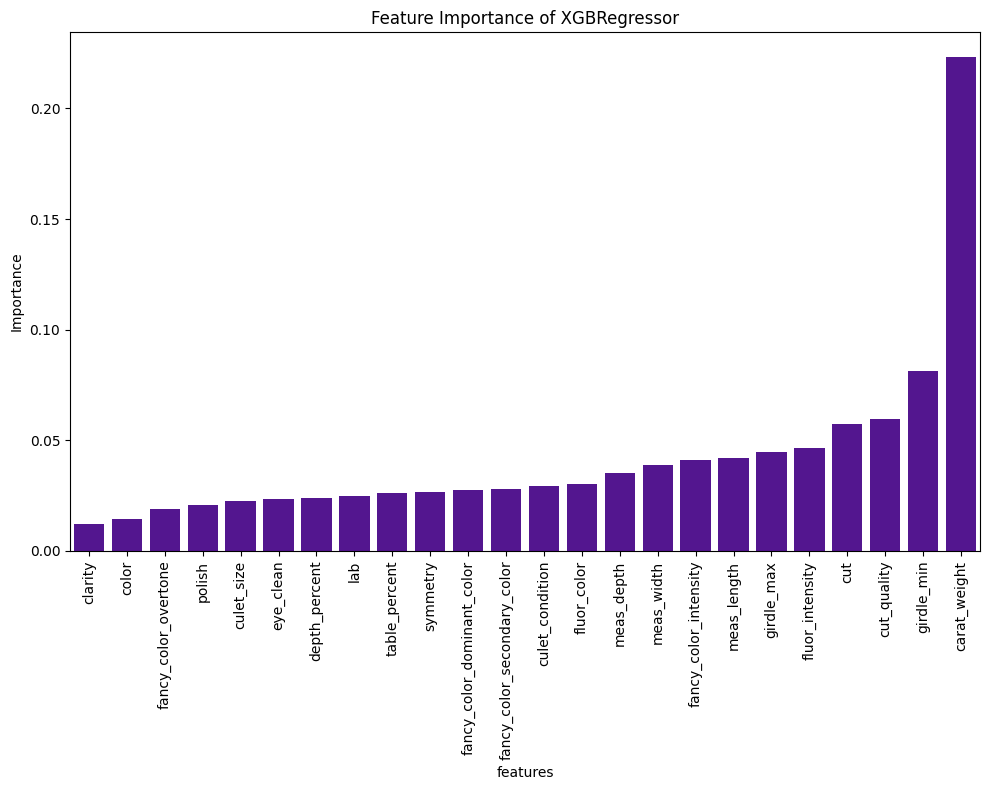

In [43]:
# Create a DataFrame to hold feature importance
feature_importance = pd.DataFrame()
feature_importance['Importance'] = best_model.feature_importances_
feature_importance['features'] = np.array(cols)

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values('Importance', ascending=True).reset_index()

# Plot the feature importance
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=feature_importance, x='features', y='Importance', ax=ax, order=feature_importance['features'])
ax.set_title("Feature Importance of XGBRegressor")
plt.xticks(rotation = 90)
fig.tight_layout()

<ul style="font-size: 18px">
    <li>Here we can see the feature importance of features for our dataset.</li>
    <li>As shown above, carat weight has the highest importance of all to determine the price of the diamond!</li>
</ul>